# Feature engineering

In this step we are going to try diffrent methods that are crucial for feature selection and creating other new  features that may help us in improving our model accuracy. In our case the traget variable is: EverDelinquent.

Import libraries

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

1. **Feature selection:**

For feature selection, we will use supervised techniques based on identifying the relationship with the target variable.
At this point, we will evaluate different metrics and then analyze the results to determine which one is best for our data problem.

Inspect the data

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
transformed_Loan_Export_dataset=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/combined_df.csv')

<ipython-input-5-3b07f53f06b5>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  transformed_Loan_Export_dataset=pd.read_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/combined_df.csv')


In [ ]:
transformed_Loan_Export_dataset

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Cluster,PC1,PC2
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,0,-1.441104,-0.536466
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,0,1.177192,0.495181
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,0,0.782831,-0.207294
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,0,0.562021,-0.950408
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,0,0.389587,-0.417033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12,1,1.622631,-0.693695
266453,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53,2,0.992728,-1.444650
266454,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38,2,1.163638,-0.670818
266455,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32,1,-0.099816,-0.413003


In [ ]:
transformed_Loan_Export_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266457 entries, 0 to 266456
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         266457 non-null  int64  
 1   FirstPaymentDate    266457 non-null  object 
 2   FirstTimeHomebuyer  266457 non-null  object 
 3   MaturityDate        266457 non-null  object 
 4   MSA                 266457 non-null  object 
 5   MIP                 266457 non-null  int64  
 6   Units               266457 non-null  int64  
 7   Occupancy           266457 non-null  object 
 8   OCLTV               266457 non-null  int64  
 9   DTI                 266457 non-null  int64  
 10  OrigUPB             266457 non-null  int64  
 11  LTV                 266457 non-null  int64  
 12  OrigInterestRate    266457 non-null  float64
 13  Channel             266457 non-null  object 
 14  PPM                 266457 non-null  object 
 15  ProductType         266457 non-nul

Check data types

In [ ]:
transformed_Loan_Export_dataset['FirstPaymentDate'] = pd.to_datetime(transformed_Loan_Export_dataset['FirstPaymentDate'])
transformed_Loan_Export_dataset['MaturityDate'] = pd.to_datetime(transformed_Loan_Export_dataset['MaturityDate'])

In [ ]:
transformed_Loan_Export_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266457 entries, 0 to 266456
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         266457 non-null  int64         
 1   FirstPaymentDate    266457 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  266457 non-null  object        
 3   MaturityDate        266457 non-null  datetime64[ns]
 4   MSA                 266457 non-null  object        
 5   MIP                 266457 non-null  int64         
 6   Units               266457 non-null  int64         
 7   Occupancy           266457 non-null  object        
 8   OCLTV               266457 non-null  int64         
 9   DTI                 266457 non-null  int64         
 10  OrigUPB             266457 non-null  int64         
 11  LTV                 266457 non-null  int64         
 12  OrigInterestRate    266457 non-null  float64       
 13  Channel             266457 no

In [ ]:
transformed_Loan_Export_dataset.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

After doing EDA we may conclude some irrelevant features that are not contributing in the modeling process and have no direct or indirect relationship with the target variable.

These columns will be removed from the dataset.The columns are:
- LoanSeqNum
- 'PostalCode'
- 'ProductType'
- 'SellerName'
- 'ServicerName'
- 'MSA'

Another reason why we should remove them is that categorical variables with a large number of categories that require encoding will lead to a complex distribution of the data set and will then affect the performance of the model.

Drop columns

In [ ]:
# Drop irrelevant features
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['LoanSeqNum', 'PostalCode', 'ProductType', 'SellerName', 'ServicerName',])

In [ ]:
# Drop irrelevant features
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['MSA'])

Encode  categorical variables:

In [ ]:
transformed_Loan_Export_dataset.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'Cluster', 'PC1', 'PC2'],
      dtype='object')

- Binary encoding

Let's add an other column that is called 'IsHomeFirstBuyer' that indicates if a borrower is first buyer or not

In [ ]:
# Step 1: Remove rows where 'FirstTimeHomebuyer' is 'X'
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset[transformed_Loan_Export_dataset['FirstTimeHomebuyer'] != 'X']

# Step 2: Add the new column 'isHomeFirstBuyer'
transformed_Loan_Export_dataset['isHomeFirstBuyer'] = transformed_Loan_Export_dataset['FirstTimeHomebuyer'].map({'Y': 1, 'N': 0})

In [ ]:
# Check the unique values in the NumBorrowers column
print(transformed_Loan_Export_dataset['isHomeFirstBuyer'].unique())

[0 1]


Encoding for PPM

In [ ]:
transformed_Loan_Export_dataset['PPM_Encoded'] = transformed_Loan_Export_dataset['PPM'].map({'X': 1, 'Y': 1, 'N': 0})

Let's filter now where NumBorrowers is 'X', as it's a small portion of data

In [ ]:
# Filter out rows where NumBorrowers is 'X'
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset[transformed_Loan_Export_dataset['NumBorrowers'] != 'X ']

In [ ]:
# Check the unique values in the NumBorrowers column
print(transformed_Loan_Export_dataset['NumBorrowers'].unique())

['2' '1']


In [ ]:
transformed_Loan_Export_dataset.isna().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0
OrigUPB,0


- Frequency encoding

In [ ]:
for col in ['Channel', 'LoanPurpose', 'Occupancy', 'PropertyType']:
    frequency_encoding = transformed_Loan_Export_dataset[col].value_counts(normalize=True)
    transformed_Loan_Export_dataset[f'{col}_Frequency'] = transformed_Loan_Export_dataset[col].map(frequency_encoding)

In [ ]:
frequency_encoding = transformed_Loan_Export_dataset['PropertyState'].value_counts(normalize=True)
transformed_Loan_Export_dataset['PropertyState_Frequency'] = transformed_Loan_Export_dataset['PropertyState'].map(frequency_encoding)

 Now let's group the LTV.
 The Loan-to-Value (LTV) ratio can be grouped also into various categories to simplify analysis and interpretation.
 Let's follow this approach:
- Low LTV: Generally considered to be 80% or less.
- Medium LTV: Typically between 80% and 90%.
- High LTV: Typically above 90%.

In [ ]:
# Define the bins and labels
bins = [0, 80, 90, 100]
labels = ['Low LTV', 'Medium LTV', 'High LTV']

# Create a new column 'LTV_Group' with the grouped values
transformed_Loan_Export_dataset['LTV_Group'] = pd.cut(transformed_Loan_Export_dataset['LTV'], bins=bins, labels=labels, right=False)

In [ ]:
transformed_Loan_Export_dataset.head(5)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Cluster,PC1,PC2,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group
0,0,1999-02-01,N,2029-01-01,25,1,O,89,27,117000,89,6.750,T,N,IL,SF,P,360,2,0,0,52,0,-1.441104,-0.536466,0,0,0.573742,0.525238,0.957294,0.830023,0.048890,Medium LTV
1,0,1999-02-01,N,2029-01-01,0,1,O,73,17,109000,73,6.500,R,N,CO,SF,N,360,1,0,0,144,0,1.177192,0.495181,0,0,0.424460,0.309485,0.957294,0.830023,0.032029,Low LTV
2,0,1999-02-01,N,2029-01-01,0,1,O,75,16,88000,75,6.875,T,N,KS,SF,N,360,2,0,0,67,0,0.782831,-0.207294,0,0,0.573742,0.309485,0.957294,0.830023,0.008438,Low LTV
3,0,1999-02-01,N,2029-01-01,0,1,O,76,14,160000,76,6.875,R,N,CA,SF,N,360,2,0,0,35,0,0.562021,-0.950408,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,Low LTV
4,0,1999-02-01,N,2029-01-01,0,1,O,78,18,109000,78,7.125,R,N,NJ,SF,N,360,2,0,0,54,0,0.389587,-0.417033,0,0,0.424460,0.309485,0.957294,0.830023,0.026190,Low LTV


Let's group the credit score data with categorical groups,
in the EDA we have discovered the different groups of credit score this the details:
Here are some commonly used categories for credit scores:
- FICO Score Categories:
Very Poor: 300-579
Poor: 580-669
Fair: 670-739
Good: 740-799
Excellent: 800-850
- Vantage Score Categories:
Very Poor: 300-499
Poor: 500-600
Fair: 601-660
Good: 661-780
Excellent: 781-850

 Let's use the FICO Score Categories, as it is commonly used and well-recognized in the industry.

In [ ]:
# Inspect unique values in CreditScore column
unique_credit_scores = transformed_Loan_Export_dataset['CreditScore'].unique()

In [ ]:
print(f'Unique Credit Scores: {unique_credit_scores}')

Unique Credit Scores: [  0 335 342 366 375 396 466 471 476 477 479 481 482 483 486 487 489 490
 492 494 495 496 497 498 499 500 502 503 504 505 506 507 508 509 510 511
 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529
 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547
 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565
 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583
 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601
 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619
 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637
 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655
 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673
 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691
 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709
 710 711 712 713 714 715 716 

For the CreditScore values that are 0, we can consider them as missing or erroneous data points.

We need to remove them

In [ ]:
len(transformed_Loan_Export_dataset[transformed_Loan_Export_dataset['CreditScore'] == 0])/len(transformed_Loan_Export_dataset)*100

0.44873483114199464

It's a small percentage of 0.44 %

In [ ]:
# Step 1: Remove rows where 'CreditScore' is 0
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset[transformed_Loan_Export_dataset['CreditScore'] != 0]

In [ ]:
# Define the bins and labels for FICO Score Categories
fico_bins = [300, 580, 670, 740, 800, 851]
fico_labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']
# Create a new column 'FICO_Category' with the grouped values
transformed_Loan_Export_dataset['FICO_Category'] = pd.cut(transformed_Loan_Export_dataset['CreditScore'], bins=fico_bins, labels=fico_labels, right=False)

In [ ]:
len(transformed_Loan_Export_dataset)

196558

Let's do the same process with the variable 'MonthsInRepayment'.
We will group this varaible into 5 categories after transform months to years by dividing with 12

In [ ]:
# Convert MonthsInRepayment to years
transformed_Loan_Export_dataset['YearsInRepayment'] = transformed_Loan_Export_dataset['MonthsInRepayment'] / 12

# Display the updated DataFrame
transformed_Loan_Export_dataset[['MonthsInRepayment', 'YearsInRepayment']].head(20)


,MonthsInRepayment,YearsInRepayment
1078,163,13.583333
1079,165,13.750000
1081,65,5.416667
1083,55,4.583333
1085,133,11.083333
1086,53,4.416667
1088,48,4.000000
1089,72,6.000000
1090,156,13.000000
1091,4,0.333333


In [ ]:
# Define the bins and labels for YearsInRepayment categories
bins = [0, 4, 8, 12, 16, 20, float('inf')]
labels = ['0-4 years', '4-8 years', '8-12 years', '12-16 years', '16-20 years', '20+ years']

# Create a new column 'YearsInRepayment_Group' with the grouped values
transformed_Loan_Export_dataset['YearsInRepayment_Group'] = pd.cut(
    transformed_Loan_Export_dataset['YearsInRepayment'], bins=bins, labels=labels, right=False, include_lowest=True
)

# Display the updated DataFrame
transformed_Loan_Export_dataset[['YearsInRepayment', 'YearsInRepayment_Group']].head(20)


,YearsInRepayment,YearsInRepayment_Group
1078,13.583333,12-16 years
1079,13.750000,12-16 years
1081,5.416667,4-8 years
1083,4.583333,4-8 years
1085,11.083333,8-12 years
1086,4.416667,4-8 years
1088,4.000000,4-8 years
1089,6.000000,4-8 years
1090,13.000000,12-16 years
1091,0.333333,0-4 years


The resulted dataframe

In [ ]:
transformed_Loan_Export_dataset

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group,FICO_Category,YearsInRepayment,YearsInRepayment_Group
1078,335,1999-04-01,N,2029-03-01,0,1,O,71,21,116000,71,6.875,T,N,MI,SF,C,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,13.583333,12-16 years
1079,342,1999-05-01,N,2029-04-01,0,1,O,79,28,96000,79,6.875,R,N,GA,PU,N,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,Low LTV,Very Poor,13.750000,12-16 years
1081,366,1999-03-01,N,2029-02-01,0,1,O,65,25,66000,65,6.625,R,N,MI,SF,C,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,5.416667,4-8 years
1083,375,1999-03-01,N,2029-02-01,0,1,O,64,22,125000,64,6.875,R,N,MI,SF,C,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4.583333,4-8 years
1085,396,1999-04-01,N,2029-03-01,0,1,O,66,37,65000,66,6.875,R,N,FL,SF,N,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,Low LTV,Very Poor,11.083333,8-12 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,839,1999-03-01,N,2029-02-01,0,1,O,60,32,90000,60,7.000,R,N,PA,SF,N,360,2,0,0,12,0,0,0.424460,0.309485,0.957294,0.830023,0.025901,Low LTV,Excellent,1.000000,0-4 years
266453,840,2002-10-01,N,2029-04-01,0,1,O,73,0,267000,73,6.375,C,N,NY,SF,P,319,2,0,0,53,0,0,0.001200,0.525238,0.957294,0.830023,0.029857,Low LTV,Excellent,4.416667,4-8 years
266454,840,2003-04-01,N,2029-04-01,0,1,O,73,31,87000,73,5.625,R,N,CA,SF,N,313,1,0,0,38,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,Low LTV,Excellent,3.166667,0-4 years
266455,845,1999-04-01,N,2029-03-01,0,1,I,80,54,88000,80,7.000,R,N,PA,SF,P,360,2,0,0,32,0,0,0.424460,0.525238,0.023510,0.830023,0.025901,Medium LTV,Excellent,2.666667,0-4 years


Remove redudant columns

In [ ]:
#Drop irrelevant features
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['CreditScore','LTV','FirstTimeHomebuyer','YearsInRepayment'])

In [ ]:
#Drop irrelevant features
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['Occupancy','Channel','PPM','PropertyState','PropertyType','LoanPurpose'])

Now let's check if the loan term is equal to the original loan term, I will calculate the time difference between MaturityDate and FirstPaymentDate.

In [ ]:
# Calculate the loan term in months
transformed_Loan_Export_dataset['loanTerm'] = (transformed_Loan_Export_dataset['MaturityDate'] - transformed_Loan_Export_dataset['FirstPaymentDate']).dt.days / 30.44
transformed_Loan_Export_dataset['loanTerm'] = transformed_Loan_Export_dataset['loanTerm'].astype(int)

In [ ]:
# Compare loanTerm with OrigLoanTerm
transformed_Loan_Export_dataset['LoanTermMatches'] = transformed_Loan_Export_dataset['loanTerm'] == transformed_Loan_Export_dataset['OrigLoanTerm']

In [ ]:
# Check the percentage of loans where the terms match
percentage_match = transformed_Loan_Export_dataset['LoanTermMatches'].mean() * 100
print(f"Percentage of loans where the calculated term matches the original term: {percentage_match:.2f}%")

Percentage of loans where the calculated term matches the original term: 0.00%


In [ ]:
# Display the relevant columns
transformed_Loan_Export_dataset[['FirstPaymentDate', 'MaturityDate', 'OrigLoanTerm', 'loanTerm', 'LoanTermMatches']].head(100)


,FirstPaymentDate,MaturityDate,OrigLoanTerm,loanTerm,LoanTermMatches
1078,1999-04-01,2029-03-01,360,358,False
1079,1999-05-01,2029-04-01,360,359,False
1081,1999-03-01,2029-02-01,360,359,False
1083,1999-03-01,2029-02-01,360,359,False
1085,1999-04-01,2029-03-01,360,358,False
...,...,...,...,...,...
1246,1999-03-01,2029-02-01,360,359,False
1247,1999-03-01,2029-02-01,360,359,False
1248,1999-03-01,2029-02-01,360,359,False
1252,1999-03-01,2029-02-01,360,359,False


Calculate the absolute difference between the original and calculated loan terms to make sure if they are nearly identical.

In [ ]:
transformed_Loan_Export_dataset['TermDifference'] = abs(transformed_Loan_Export_dataset['OrigLoanTerm'] - transformed_Loan_Export_dataset['loanTerm'])

# Define a tolerance level, e.g., 1 month
tolerance = 2

# Create a new column to indicate if the terms are nearly identical
transformed_Loan_Export_dataset['TermsNearIdentical'] = transformed_Loan_Export_dataset['TermDifference'] <= tolerance

# Check the percentage of TermsNearIdentical
percentage_match = transformed_Loan_Export_dataset['TermsNearIdentical'].mean() * 100
print(f"Percentage of TermsNearIdentical: {percentage_match:.2f}%")

Percentage of TermsNearIdentical: 100.00%


In [ ]:
# Display the results
transformed_Loan_Export_dataset[['OrigLoanTerm', 'loanTerm', 'TermDifference', 'TermsNearIdentical']].head()


,OrigLoanTerm,loanTerm,TermDifference,TermsNearIdentical
1078,360,358,2,True
1079,360,359,1,True
1081,360,359,1,True
1083,360,359,1,True
1085,360,358,2,True


There is a difference of one to two days. We will remove the two columns MaturityDate and FirstPaymentDate and keep only OrigLoanTerm.

In [ ]:
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['FirstPaymentDate','MaturityDate',])

In [ ]:
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['LoanTermMatches','loanTerm','TermDifference','TermsNearIdentical'])

In [ ]:
transformed_Loan_Export_dataset

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group,FICO_Category,YearsInRepayment_Group
1078,0,1,71,21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,12-16 years
1079,0,1,79,28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,Low LTV,Very Poor,12-16 years
1081,0,1,65,25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years
1083,0,1,64,22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years
1085,0,1,66,37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,Low LTV,Very Poor,8-12 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,0,1,60,32,90000,7.000,360,2,0,0,12,0,0,0.424460,0.309485,0.957294,0.830023,0.025901,Low LTV,Excellent,0-4 years
266453,0,1,73,0,267000,6.375,319,2,0,0,53,0,0,0.001200,0.525238,0.957294,0.830023,0.029857,Low LTV,Excellent,4-8 years
266454,0,1,73,31,87000,5.625,313,1,0,0,38,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,Low LTV,Excellent,0-4 years
266455,0,1,80,54,88000,7.000,360,2,0,0,32,0,0,0.424460,0.525238,0.023510,0.830023,0.025901,Medium LTV,Excellent,0-4 years


We should encode the categorical variables

In [ ]:
# Encoding LTV_Group
ltv_mapping = {'Low LTV': 0, 'Medium LTV': 1, 'High LTV': 2}
transformed_Loan_Export_dataset['LTV_Group_Encoded'] = transformed_Loan_Export_dataset['LTV_Group'].map(ltv_mapping)

# Encoding FICO_Category
fico_mapping = {'Very Poor': 0, 'Poor': 1, 'Fair': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
transformed_Loan_Export_dataset['FICO_Category_Encoded'] = transformed_Loan_Export_dataset['FICO_Category'].map(fico_mapping)

# Encoding YearsInRepayment_Group
years_mapping = {'0-4 years': 0, '4-8 years': 1, '8-12 years': 2, '12-16 years': 3, '16-20 years': 4, '20+ years': 5}
transformed_Loan_Export_dataset['YearsInRepayment_Group_Encoded'] = transformed_Loan_Export_dataset['YearsInRepayment_Group'].map(years_mapping)


In [ ]:
transformed_Loan_Export_dataset

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group,FICO_Category,YearsInRepayment_Group,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded
1078,0,1,71,21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,12-16 years,0,0,3
1079,0,1,79,28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,Low LTV,Very Poor,12-16 years,0,0,3
1081,0,1,65,25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years,0,0,1
1083,0,1,64,22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years,0,0,1
1085,0,1,66,37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,Low LTV,Very Poor,8-12 years,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,0,1,60,32,90000,7.000,360,2,0,0,12,0,0,0.424460,0.309485,0.957294,0.830023,0.025901,Low LTV,Excellent,0-4 years,0,5,0
266453,0,1,73,0,267000,6.375,319,2,0,0,53,0,0,0.001200,0.525238,0.957294,0.830023,0.029857,Low LTV,Excellent,4-8 years,0,5,1
266454,0,1,73,31,87000,5.625,313,1,0,0,38,0,0,0.424460,0.309485,0.957294,0.830023,0.145089,Low LTV,Excellent,0-4 years,0,5,0
266455,0,1,80,54,88000,7.000,360,2,0,0,32,0,0,0.424460,0.525238,0.023510,0.830023,0.025901,Medium LTV,Excellent,0-4 years,1,5,0


Remove the categorical data

In [ ]:
transformed_Loan_Export_dataset.head()

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group,FICO_Category,YearsInRepayment_Group,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded
1078,0,1,71,21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,12-16 years,0,0,3
1079,0,1,79,28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,Low LTV,Very Poor,12-16 years,0,0,3
1081,0,1,65,25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years,0,0,1
1083,0,1,64,22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,Low LTV,Very Poor,4-8 years,0,0,1
1085,0,1,66,37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,Low LTV,Very Poor,8-12 years,0,0,2


Check the null values

In [ ]:
transformed_Loan_Export_dataset.isna().sum()

,0
MIP,0
Units,0
OCLTV,0
DTI,0
OrigUPB,0
OrigInterestRate,0
OrigLoanTerm,0
NumBorrowers,0
EverDelinquent,0
MonthsDelinquent,0


In [ ]:
transformed_Loan_Export_dataset.dropna(inplace=True)

In [ ]:
transformed_Loan_Export_dataset.isna().sum()

,0
MIP,0
Units,0
OCLTV,0
DTI,0
OrigUPB,0
OrigInterestRate,0
OrigLoanTerm,0
NumBorrowers,0
EverDelinquent,0
MonthsDelinquent,0


For feature selection, we must apply the mutual information score technique to identify features that are relevant for modeling.

In [ ]:
transformed_Loan_Export_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196552 entries, 1078 to 266456
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   MIP                             196552 non-null  int64   
 1   Units                           196552 non-null  int64   
 2   OCLTV                           196552 non-null  int64   
 3   DTI                             196552 non-null  int64   
 4   OrigUPB                         196552 non-null  int64   
 5   OrigInterestRate                196552 non-null  float64 
 6   OrigLoanTerm                    196552 non-null  int64   
 7   NumBorrowers                    196552 non-null  object  
 8   EverDelinquent                  196552 non-null  int64   
 9   MonthsDelinquent                196552 non-null  int64   
 10  MonthsInRepayment               196552 non-null  int64   
 11  isHomeFirstBuyer                196552 non-null  int64   
 12  PPM_

In [ ]:
transformed_Loan_Export_dataset = transformed_Loan_Export_dataset.drop(columns=['LTV_Group',
   'FICO_Category',
  'YearsInRepayment_Group'])

In [ ]:
X = transformed_Loan_Export_dataset.drop('EverDelinquent', axis=1)
y = transformed_Loan_Export_dataset['EverDelinquent']

# Compute mutual information scores
mi_scores = mutual_info_classif(transformed_Loan_Export_dataset, y, discrete_features='auto')

# Create a DataFrame with the scores
mi_scores_df = pd.DataFrame({'Feature': transformed_Loan_Export_dataset.columns, 'MI Score': mi_scores})

# Sort features by their MI score
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Select top N features
top_n = 20  # Adjust based on your requirement
top_features = mi_scores_df.head(top_n)['Feature'].tolist()

print("Top Features based on Mutual Information:")
print(top_features)


Top Features based on Mutual Information:
['EverDelinquent', 'MonthsDelinquent', 'FICO_Category_Encoded', 'OrigLoanTerm', 'Units', 'Occupancy_Frequency', 'MonthsInRepayment', 'NumBorrowers', 'YearsInRepayment_Group_Encoded', 'PropertyType_Frequency', 'Channel_Frequency', 'LoanPurpose_Frequency', 'LTV_Group_Encoded', 'OrigInterestRate', 'MIP', 'PropertyState_Frequency', 'OCLTV', 'DTI', 'OrigUPB', 'PPM_Encoded']


In [ ]:
transformed_Loan_Export_dataset.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded'],
      dtype='object')

In [ ]:
mi_scores_df

,Feature,MI Score
8,EverDelinquent,0.497983
9,MonthsDelinquent,0.493379
19,FICO_Category_Encoded,0.042048
6,OrigLoanTerm,0.035047
1,Units,0.031931
15,Occupancy_Frequency,0.031530
10,MonthsInRepayment,0.028507
7,NumBorrowers,0.026489
20,YearsInRepayment_Group_Encoded,0.024643
16,PropertyType_Frequency,0.024068


- High Mutual Information Scores:

EverDelinquent and MonthsDelinquent have the highest mutual information scores, suggesting that they are strongly related to the target variable. This is expected since MonthsDelinquent directly correlates with the delinquency status.

- FICO Score Importance:

FICO_Category_Encoded has a significant score, which aligns with the common understanding that credit scores are a strong predictor of delinquency.

- Loan and Borrower Characteristics:

Features like OrigLoanTerm, Units, NumBorrowers, and YearsInRepayment_Group_Encoded are important as they relate to the loan structure and borrower demographics.

- Property and Loan Attributes:

PropertyType_Frequency and LTV_Group_Encoded indicate the importance of property type and loan-to-value ratios in predicting delinquency.

- Minimal or No Contribution:

Features such as DTI, PPM_Encoded, and OrigUPB have low or zero scores, suggesting they contribute little to predicting the target variable.

**We will choose features  that have MI score greater than 0.01**

Evaluate the importance of  features:

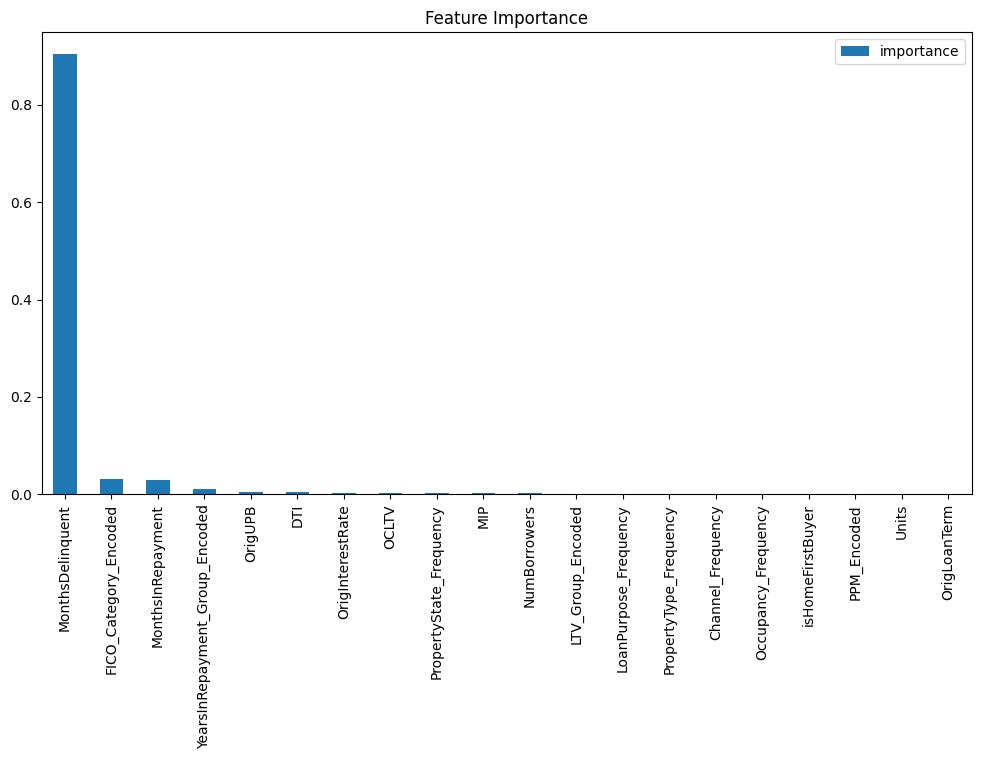

In [ ]:
X = transformed_Loan_Export_dataset.drop(columns=['EverDelinquent'])
y = transformed_Loan_Export_dataset['EverDelinquent']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

# Select top N features
top_features = feature_importances.head(10).index
X_selected = X[top_features]


Important features  based on random forest classsifier are:

MonthsDelinquent, FICO_Category_Encoded, YearsRepayment_Group_Encoded, OrigUPB, OCLTV, DTI, OriginIntrestRate, PropertyState_Frequency and NumBorrowers.

**CONCLUSION:**

With EverDelinquent as the target, the analysis provides a comprehensive view of features that influence delinquency prediction. Here are some key takeaways:

- Historical Behavior: Features like MonthsDelinquent provide direct insights into past behavior, crucial for predicting future delinquency.
- Creditworthiness: FICO scores are essential in evaluating borrower financial health and likelihood of delinquency.
- Loan Structure and Financial Health: Loan terms, interest rates, and financial ratios are critical in understanding financial commitments and risks.
- Property and Geographic Factors: Property type, location, and associated risks can significantly impact repayment behaviors.
- Shared Responsibility: The number of borrowers and borrower demographics offer insights into shared financial responsibilities and risk distribution.

The analysis aligns well with the industry understanding of factors contributing to loan delinquency.

2. **Creation of New Features:**





Add new feature to enhance our model performance

In [ ]:
transformed_Loan_Export_dataset.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded'],
      dtype='object')

Calculate the Delinquency ratio

In [ ]:
transformed_Loan_Export_dataset['DelinquencyRatio']=transformed_Loan_Export_dataset['MonthsDelinquent']/transformed_Loan_Export_dataset['MonthsInRepayment']

Calculate the payment progress ratio

In [ ]:
transformed_Loan_Export_dataset['PaymentProgressRatio']=transformed_Loan_Export_dataset['MonthsInRepayment']/transformed_Loan_Export_dataset['OrigLoanTerm']

Delinquent loan term Ratio

In [ ]:
transformed_Loan_Export_dataset['DelinquentLoanTermRatio']=transformed_Loan_Export_dataset['MonthsDelinquent']/transformed_Loan_Export_dataset['OrigLoanTerm']

Calculate the loan amortization factor:

In [ ]:
transformed_Loan_Export_dataset['LoanAmortizationFactore']=transformed_Loan_Export_dataset['OrigUPB']/transformed_Loan_Export_dataset['OrigInterestRate']*transformed_Loan_Export_dataset['OrigLoanTerm']

Add a monthly income for the borrower:

In [ ]:
# Calculate monthly interest rate
transformed_Loan_Export_dataset['MonthlyInterestRate'] = transformed_Loan_Export_dataset['OrigInterestRate'] / 100 / 12
# Calculate monthly loan payment using the formula
transformed_Loan_Export_dataset['MonthlyLoanPayment'] = transformed_Loan_Export_dataset.apply(lambda row: row['OrigUPB'] * (row['MonthlyInterestRate'] * (1 + row['MonthlyInterestRate']) ** row['OrigLoanTerm']) / ((1 + row['MonthlyInterestRate']) ** row['OrigLoanTerm'] - 1), axis=1)


Add the DSCR ratio:

In [ ]:
transformed_Loan_Export_dataset['DTI'] = transformed_Loan_Export_dataset['DTI'] / 100

# Estimate Monthly Income
transformed_Loan_Export_dataset['EstimatedMonthlyIncome'] = transformed_Loan_Export_dataset['MonthlyLoanPayment'] / transformed_Loan_Export_dataset['DTI']

# Calculate DSCR
transformed_Loan_Export_dataset['DSCR'] = transformed_Loan_Export_dataset['EstimatedMonthlyIncome'] / transformed_Loan_Export_dataset['MonthlyLoanPayment']


In [ ]:
transformed_Loan_Export_dataset.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

Check the data

In [ ]:
transformed_Loan_Export_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196552 entries, 1078 to 266456
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   MIP                             196552 non-null  int64   
 1   Units                           196552 non-null  int64   
 2   OCLTV                           196552 non-null  int64   
 3   DTI                             196552 non-null  float64 
 4   OrigUPB                         196552 non-null  int64   
 5   OrigInterestRate                196552 non-null  float64 
 6   OrigLoanTerm                    196552 non-null  int64   
 7   NumBorrowers                    196552 non-null  object  
 8   EverDelinquent                  196552 non-null  int64   
 9   MonthsDelinquent                196552 non-null  int64   
 10  MonthsInRepayment               196552 non-null  int64   
 11  isHomeFirstBuyer                196552 non-null  int64   
 12  PPM_

In [ ]:
transformed_Loan_Export_dataset.head(20)

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
1078,0,1,71,0.21,116000,6.875,360,2,0,0,163,0,0,0.573742,0.165277,0.957294,0.830023,0.059521,0,0,3,0.000000,0.452778,0.000000,6.074182e+06,0.005729,762.037424,3628.749637,4.761905
1079,0,1,79,0.28,96000,6.875,360,1,1,1,165,0,0,0.424460,0.309485,0.957294,0.104830,0.034314,0,0,3,0.006061,0.458333,0.002778,5.026909e+06,0.005729,630.651661,2252.327361,3.571429
1081,0,1,65,0.25,66000,6.625,360,2,0,0,65,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.180556,0.000000,3.586415e+06,0.005521,422.605234,1690.420937,4.000000
1083,0,1,64,0.22,125000,6.875,360,2,0,0,55,0,0,0.424460,0.165277,0.957294,0.830023,0.059521,0,0,1,0.000000,0.152778,0.000000,6.545455e+06,0.005729,821.161017,3732.550078,4.545455
1085,0,1,66,0.37,65000,6.875,360,2,0,0,133,0,0,0.424460,0.309485,0.957294,0.830023,0.067482,0,0,2,0.000000,0.369444,0.000000,3.403636e+06,0.005729,427.003729,1154.064132,2.702703
1086,25,1,90,0.00,159000,7.125,360,2,0,0,53,0,1,0.424460,0.309485,0.957294,0.830023,0.145089,2,0,1,0.000000,0.147222,0.000000,8.033684e+06,0.005937,1071.212452,inf,inf
1088,25,1,89,0.40,111000,7.000,360,1,0,0,48,0,0,0.573742,0.525238,0.957294,0.062205,0.034314,1,0,1,0.000000,0.133333,0.000000,5.708571e+06,0.005833,738.485770,1846.214424,2.500000
1089,0,1,67,0.28,110000,6.875,360,2,0,0,72,1,0,0.424460,0.525238,0.957294,0.104830,0.067482,0,0,1,0.000000,0.200000,0.000000,5.760000e+06,0.005729,722.621695,2580.791768,3.571429
1090,0,1,72,0.41,68000,7.125,360,2,0,0,156,0,1,0.424460,0.165277,0.957294,0.830023,0.003348,0,0,3,0.000000,0.433333,0.000000,3.435789e+06,0.005937,458.128596,1117.386819,2.439024
1091,30,1,95,0.34,166000,7.625,360,2,0,0,4,0,0,0.573742,0.525238,0.957294,0.830023,0.067482,2,0,0,0.000000,0.011111,0.000000,7.837377e+06,0.006354,1174.937619,3455.698879,2.941176


3. **Normalization and Scaling:**

In [ ]:
# Convert numeric strings to integers
transformed_Loan_Export_dataset['NumBorrowers'] = transformed_Loan_Export_dataset['NumBorrowers'].astype(int)

In [ ]:
transformed_Loan_Export_dataset.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

Check for infinite values

In [ ]:
# Check for infinite values
print("Infinite values in dataset:")
print(transformed_Loan_Export_dataset.isin([np.inf, -np.inf]).sum())

Infinite values in dataset:
MIP                                  0
Units                                0
OCLTV                                0
DTI                                  0
OrigUPB                              0
OrigInterestRate                     0
OrigLoanTerm                         0
NumBorrowers                         0
EverDelinquent                       0
MonthsDelinquent                     0
MonthsInRepayment                    0
Cluster                              0
PC1                                  0
PC2                                  0
isHomeFirstBuyer                     0
PPM_Encoded                          0
Channel_Frequency                    0
LoanPurpose_Frequency                0
Occupancy_Frequency                  0
PropertyType_Frequency               0
PropertyState_Frequency              0
LTV_Group_Encoded                    0
FICO_Category_Encoded                0
YearsInRepayment_Group_Encoded       0
DelinquencyRatio                    

In [ ]:
transformed_Loan_Export_dataset.columns

Index(['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR'],
      dtype='object')

In [ ]:
transformed_Loan_Export_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194380 entries, 1078 to 266456
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MIP                             194380 non-null  float64
 1   Units                           194380 non-null  float64
 2   OCLTV                           194380 non-null  float64
 3   DTI                             194380 non-null  float64
 4   OrigUPB                         194380 non-null  float64
 5   OrigInterestRate                194380 non-null  float64
 6   OrigLoanTerm                    194380 non-null  float64
 7   NumBorrowers                    194380 non-null  float64
 8   EverDelinquent                  194380 non-null  int64  
 9   MonthsDelinquent                194380 non-null  float64
 10  MonthsInRepayment               194380 non-null  float64
 11  isHomeFirstBuyer                194380 non-null  float64
 12  PPM_Encoded       

In [ ]:
# Replace infinite values with NaN
transformed_Loan_Export_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop rows with NaN
transformed_Loan_Export_dataset.dropna(inplace=True)

In [ ]:
transformed_Loan_Export_dataset.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/PrepaymentData.csv',index=False)

In [ ]:
# Identify numerical columns
numerical_features = ['MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'OrigLoanTerm', 'NumBorrowers', 'MonthsDelinquent',
       'MonthsInRepayment', 'isHomeFirstBuyer', 'PPM_Encoded',
       'Channel_Frequency', 'LoanPurpose_Frequency', 'Occupancy_Frequency',
       'PropertyType_Frequency', 'PropertyState_Frequency',
       'LTV_Group_Encoded', 'FICO_Category_Encoded',
       'YearsInRepayment_Group_Encoded', 'DelinquencyRatio',
       'PaymentProgressRatio', 'DelinquentLoanTermRatio',
       'LoanAmortizationFactore', 'MonthlyInterestRate', 'MonthlyLoanPayment',
       'EstimatedMonthlyIncome', 'DSCR']
# Split the data into training and testing sets
train_data, test_data = train_test_split(transformed_Loan_Export_dataset, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Display the first few rows of the transformed training data
train_data.head()


,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
39837,-0.786250,-0.121637,-0.589227,1.089334,0.328832,-1.288765,0.071167,0.747057,0,-0.207458,-0.339050,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,2.234890,-1.044855,-1.403831,-0.779498,-0.270655,-0.339409,-0.207458,0.488112,-1.288765,0.215596,-0.389454,-0.525038
151397,1.494836,-0.121637,1.108356,0.905794,-0.479831,0.177915,0.071167,-1.338586,0,-0.207458,-0.294253,-0.386825,-0.211546,-1.128059,0.894798,0.209246,0.450602,-0.344070,1.315937,-0.167304,-0.779498,-0.270655,-0.294632,-0.207458,-0.495862,0.177915,-0.467182,-0.592234,-0.484449
188336,1.494836,-0.121637,1.108356,-0.837838,-1.551778,0.177915,0.071167,0.747057,0,-0.207458,2.550321,2.585151,4.727097,-1.128059,0.894798,0.209246,0.450602,-0.317463,1.315937,1.069222,2.220627,-0.270655,2.548695,-0.207458,-1.534501,0.177915,-1.552570,-0.738972,0.253214
246920,1.114655,-0.121637,0.781898,-0.011907,-0.799534,-0.188755,0.071167,0.747057,0,-0.207458,-0.271855,-0.386825,4.727097,-1.128059,-0.635682,0.209246,0.450602,-0.708742,1.315937,1.069222,0.220544,-0.270655,-0.272243,-0.207458,-0.778133,-0.188755,-0.810786,-0.540541,-0.205398
18479,-0.786250,-0.121637,-0.850394,-0.654297,-0.103708,0.177915,0.071167,0.747057,0,-0.207458,-1.122988,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,-0.582361,-1.044855,-1.403831,-0.779498,-0.270655,-1.123003,-0.207458,-0.131427,0.177915,-0.086343,0.101889,0.122764


In [ ]:
test_data.head()

,MIP,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,isHomeFirstBuyer,PPM_Encoded,Channel_Frequency,LoanPurpose_Frequency,Occupancy_Frequency,PropertyType_Frequency,PropertyState_Frequency,LTV_Group_Encoded,FICO_Category_Encoded,YearsInRepayment_Group_Encoded,DelinquencyRatio,PaymentProgressRatio,DelinquentLoanTermRatio,LoanAmortizationFactore,MonthlyInterestRate,MonthlyLoanPayment,EstimatedMonthlyIncome,DSCR
177695,-0.786250,-0.121637,0.128981,-1.571998,-0.592667,0.177915,0.071167,-1.338586,0,-0.207458,0.377693,-0.386825,-0.211546,-1.128059,0.894798,0.209246,0.450602,-0.790545,0.135541,1.069222,0.220544,-0.270655,0.377020,-0.207458,-0.605192,0.177915,-0.581433,0.522736,1.122880
237853,-0.786250,-0.121637,-0.197477,-0.103677,0.516893,-0.555425,0.071167,0.747057,0,-0.207458,-0.249457,-0.386825,-0.211546,0.842378,-1.658648,0.209246,0.450602,0.446773,-1.044855,1.069222,0.220544,-0.270655,-0.249855,-0.207458,0.573147,-0.555425,0.468890,0.105207,-0.167592
12220,1.114655,-0.121637,0.781898,1.181104,1.363168,-0.188755,0.071167,0.747057,0,-0.207458,-0.249457,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,0.018385,1.315937,-1.403831,0.220544,-0.270655,-0.249855,-0.207458,1.355466,-0.188755,1.351471,-0.028778,-0.543979
38296,1.114655,-0.121637,0.586023,0.538714,-0.573861,-0.188755,0.071167,0.747057,1,0.588281,-0.383846,-0.386825,-0.211546,0.842378,-0.635682,0.209246,0.450602,2.234890,0.135541,-1.403831,-0.779498,1.696773,-0.384185,0.588110,-0.555497,-0.188755,-0.585159,-0.567103,-0.390453
233414,-0.786250,-0.121637,-0.262769,-0.837838,0.366444,0.544586,0.071167,-1.338586,0,-0.207458,-0.406245,-0.386825,-0.211546,-1.128059,-1.658648,0.209246,0.450602,0.263328,-1.044855,1.069222,-0.779498,-0.270655,-0.406574,-0.207458,0.277763,0.544586,0.424632,0.556431,0.253214


In [ ]:
# Save the training data to a CSV file
train_data.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/train_data_scaled.csv', index=False)

# Save the testing data to a CSV file
test_data.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/test_data_scaled.csv', index=False)

# Save the combined data to a CSV file
transformed_Loan_Export_dataset.to_csv('/content/drive/MyDrive/Prepayment-Mortgage-Trading-Analysis-and-Prediction/transformed_Loan_Export_dataset.csv', index=False)


In [ ]:
len(transformed_Loan_Export_dataset)

194380